# Using breast cancer practice dataset to test sklearn KNN combined with PCA and LDA

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import timeit

Load the data and check the shape 

In [2]:
bc = load_breast_cancer()

In [3]:
breast_cancer = bc.data

In [4]:
breast_cancer.shape

(569, 30)

Concatenate the dataframe with coresponding lables 

In [5]:
lables = np.reshape(bc.target,(569,1))

In [6]:
lables.shape

(569, 1)

In [7]:
np.array(bc.feature_names).shape

(30,)

In [8]:
feature_labels = np.append(bc.feature_names, 'label')

In [9]:
feature_labels.shape

(31,)

In [10]:
breast_cancer = np.concatenate([breast_cancer,lables],axis=1)

In [11]:
breast_cancer.shape

(569, 31)

In [12]:
df = pd.DataFrame(breast_cancer,columns=feature_labels)

In [13]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


Replace numerical value to text value for labeling tuples

In [14]:
df['label'].replace(0,'Benigh',inplace = True)
df['label'].replace(1,'Malignant',inplace = True)

In [15]:
df.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benigh
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benigh
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Apply KNN without data normalization and dimensionality reduction

In [16]:
X1 = np.array(df.loc[:,bc.feature_names])
y1 = np.array(df['label'])
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

the model achieves 93.7% accuracy with out any dimensionality reduction

In [18]:
accuracy = knn.score(X_test,y_test)
print(accuracy)

0.9370629370629371


Standardization of data and check mean std

In [19]:
x = df.loc[:,bc.feature_names].values
x = StandardScaler().fit_transform(x)

In [20]:
x.shape, np.mean(x), np.std(x)

((569, 30), -6.826538293184326e-17, 1.0)

In [21]:
normalized_breast_cancer = pd.DataFrame(x,columns=bc.feature_names)

In [22]:
normalized_breast_cancer.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


### Apply PCA and pick only two principle components then use KNN

In [23]:
pca_breast = PCA(n_components = 2)
principle_component_breast = pca_breast.fit_transform(x)

In [24]:
pca_breast_cancer = pd.DataFrame(data = principle_component_breast, columns = ['PC1','PC2'])

PC1 explains 44% of variance and PC2 explains 19% variance

In [25]:
pca_breast_cancer.tail(), pca_breast.explained_variance_ratio_

(           PC1       PC2
 564   6.439315 -3.576817
 565   3.793382 -3.584048
 566   1.256179 -1.902297
 567  10.374794  1.672010
 568  -5.475243 -0.670637, array([0.44272026, 0.18971182]))

In [26]:
X2 = pca_breast_cancer[['PC1','PC2']]
y2 = np.array(df['label'])

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

In [28]:
knn_pca = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_pca.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred_pca = knn_pca.predict(X_test)

the model achieves 93.7% accuracy with Principle Component Analysis

In [30]:
accuracy = knn_pca.score(X_test,y_test)
print(accuracy)

0.9370629370629371


In [31]:
pca_breast_cancer['label'] = np.array(df['label'])

In [32]:
pca_breast_cancer.tail()

,PC1,PC2,label
564,6.439315,-3.576817,Benigh
565,3.793382,-3.584048,Benigh
566,1.256179,-1.902297,Benigh
567,10.374794,1.672010,Benigh
568,-5.475243,-0.670637,Malignant


Figure shows relatively high linear separability on 2-D plot

<Figure size 432x288 with 0 Axes>

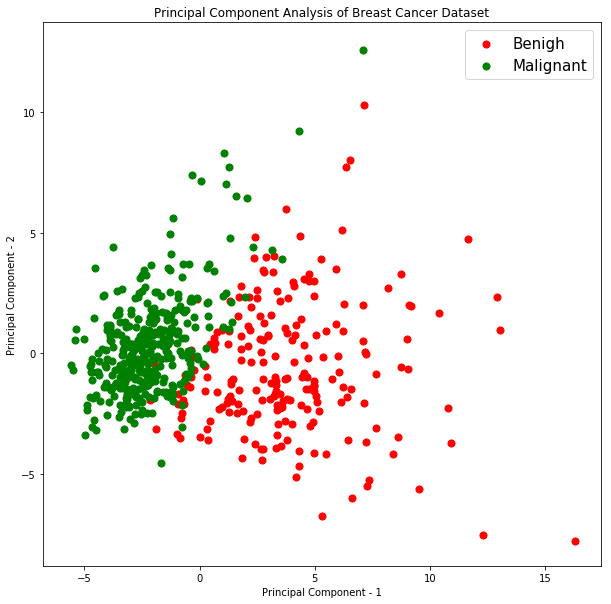

In [33]:
plt.figure()
plt.figure(figsize = (10,10))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Breast Cancer Dataset")
targets = ['Benigh', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_breast_cancer['label'] == target
    plt.scatter(pca_breast_cancer.loc[indicesToKeep, 'PC1']
               , pca_breast_cancer.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### Apply Linear Discriminant Analysis then use KNN

In [34]:
x3 = np.array(normalized_breast_cancer.loc[:,bc.feature_names].values)
y3 = np.array(df['label'])

In [35]:
x3.shape

(569, 30)

In [36]:
lda_breast = LinearDiscriminantAnalysis()
x_lda = lda_breast.fit_transform(x3,y3)

In [37]:
lda_breast_cancer = pd.DataFrame(data = x_lda, columns = ['LD1'])

In [38]:
X3 = np.array(lda_breast_cancer['LD1']).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.25,random_state=0)

In [39]:
knn_lda = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_lda.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

the model achieves 97.2% accuracy with Linear Discriminant Analysis

In [40]:
accuracy = knn_lda.score(X_test,y_test)
print(accuracy)

0.972027972027972


Visulization with LDA

In [41]:
lda_breast_cancer['y'] = np.zeros(569)

In [42]:
lda_breast_cancer['label'] = np.array(df['label'])

In [43]:
lda_breast_cancer.head()

,LD1,y,label
0,-3.323927,0.0,Benigh
1,-2.319108,0.0,Benigh
2,-3.747425,0.0,Benigh
3,-4.048549,0.0,Benigh
4,-2.281158,0.0,Benigh


Figure shows relatively high linear separability on 1-D plot

<Figure size 432x288 with 0 Axes>

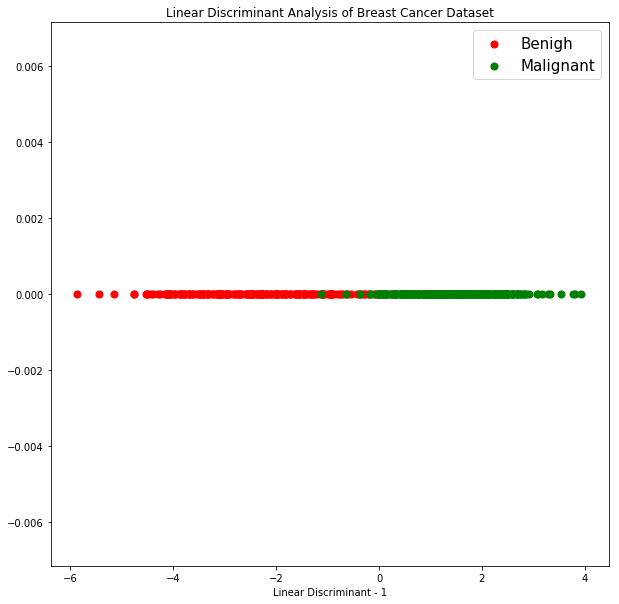

In [44]:
plt.figure()
plt.figure(figsize = (10,10))
plt.xlabel('Linear Discriminant - 1')
plt.title("Linear Discriminant Analysis of Breast Cancer Dataset")
targets = ['Benigh', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = lda_breast_cancer['label'] == target
    plt.scatter(lda_breast_cancer.loc[indicesToKeep, 'LD1']
               , lda_breast_cancer.loc[indicesToKeep, 'y'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})